## FuseNet - Loss, Accuracy, Test

<img src="http://vision.in.tum.de/_media/spezial/bib/hazirbasma2016fusenet.png">
<br>
<td> <b>Training Information & Test Results: </b> 
  <div class="popup">
    <br> FuseNet on NYU v2 - 220 Epochs
    <br> Training period: 02.07.2017 14:00 - 19:40 ~ 5.5 hrs 
    <br> Best global pixel-wise accuracy: <b>0.668</b> mean class-wise IoU accuracy: 0.300 mean accuracy: <b>0.444</b>
    <br> Org. global pixel-wise accuracy: 0.660 mean class-wise IoU accuracy: <b>0.327</b> mean accuracy: 0.434
    <br> Learning rate: 0.01 lr decay: 0.9 per 40 epochs weight decay: 0.0005 batch size: 4 best validation accuracy on epoch: 216
    <br>
    <br> FuseNet on SUN RGB-D - 250 Epochs
    <br> Training period: 02.07.2017 20:00 - 03.07.2017 17:00 ~ 21 hrs 
    <br> Best global pixel-wise accuracy: <b>0.777</b> mean class-wise IoU accuracy: 0.273 mean accuracy: 0.479
    <br> Org. global pixel-wise accuracy: 0.763 mean class-wise IoU accuracy: <b>0.373</b> mean accuracy: <b>0.483</b>
    <br> learning rate: 0.01 lr decay: 0.9 per 40 epochs weight decay: 0.0005 batch size: 4 best validation accuracy on epoch: 250
    <br> 
    <br>
  </div>
</td>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import h5py
import scipy.io
import os

from FuseNetClass import FuseNet
from utils.data_utils_class import get_data

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2


## Plot the loss, training and validation accuracy 

- During training, the training accuracy was saved for the last batch at the end of each epoch. That's why the training accuracy plot looks mad.

PLOT SELECTION. Enter '1' for NYU '2' for SUN RGB-D
1
[PROGRESS] Loading checkpoint: '/usr/stud/soenmeza/Desktop/FuseNet/models/nyu/checkpoint_class_27.pth.tar'


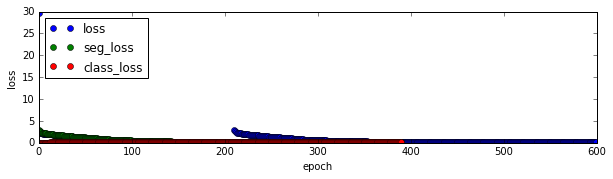

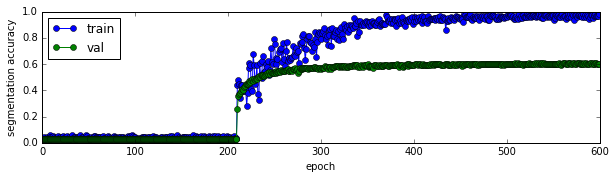

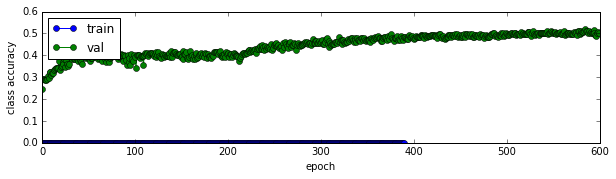

0.0306398735663
0.60747084878
0.415902140673
0.521406727829
Minimum loss/seg_loss/class_loss achieved: 0.002/0.087/0.005
Best global pixel-wise/classification accuracy: 0.607/0.521 achieved on epoch: 565/584


In [2]:
print("PLOT SELECTION. Enter '1' for NYU '2' for SUN RGB-D")

while True:
    data = input()
    if data == 1:
        #model_path = '/work/soenmeza/FuseNet/models/nyu/checkpoint_class_24.pth.tar'
        model_path = '/usr/stud/soenmeza/Desktop/FuseNet/models/nyu/checkpoint_class_27.pth.tar'
        break
    elif data == 2:
        #model_path = '/work/soenmeza/FuseNet/models/sun/checkpoint7.pth.tar'
        model_path = '/work/soenmeza/FuseNet/models/sun/model_best17.pth.tar'    
        break
    else:
        print("You gave a wrong input!")
        continue
        
if os.path.isfile(model_path):
    print("[PROGRESS] Loading checkpoint: '{}'".format(model_path))
    checkpoint = torch.load(model_path)
    trained_epoch = checkpoint['epoch']
    best_val_acc = checkpoint['best_val_acc']
    train_loss_history = checkpoint['train_loss_hist']
    train_seg_loss_history = checkpoint['train_seg_loss_hist']
    train_class_loss_history = checkpoint['train_class_loss_hist']
    train_seg_acc_history = checkpoint['train_seg_acc_hist']
    val_seg_acc_history = checkpoint['val_seg_acc_hist']
    train_class_acc_history = checkpoint['train_class_acc_hist']
    val_class_acc_history = checkpoint['val_class_acc_hist']
else:   
    print("[ERROR] No checkpoint found at '{}'".format(model_path))  

plt.subplot(3, 1, 1)
plt.plot(train_loss_history, 'o')
plt.plot(train_seg_loss_history, 'o')
plt.plot(train_class_loss_history, 'o')
plt.legend(['loss', 'seg_loss', 'class_loss'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.subplot(3, 1, 2)
plt.plot(train_seg_acc_history, '-o')
plt.plot(val_seg_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('segmentation accuracy')
plt.show()

plt.subplot(3, 1, 3)
plt.plot(train_class_acc_history, '-o')
plt.plot(val_class_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('class accuracy')
plt.show()

epoch = 280
print(np.max(val_seg_acc_history[50:100]))
print(np.max(val_seg_acc_history))
print(np.max(val_class_acc_history[50:100]))
print(np.max(val_class_acc_history))
print("Minimum loss/seg_loss/class_loss achieved: %.3f/%.3f/%.3f" %(np.min(train_loss_history),np.min(train_seg_loss_history),np.min(train_class_loss_history)))
#print("Best seg/class validation accuracy until epoch number %i: %.3f" %(epoch, np.max(train_acc_history[0:epoch])) )
print("Best global pixel-wise/classification accuracy: %.3f/%.3f achieved on epoch: %i/%i" %(np.max(val_seg_acc_history), np.max(val_class_acc_history), np.argmax(val_seg_acc_history), np.argmax(val_class_acc_history)))

# Get train and validation data


In [12]:
print("Dataset Selection. Please enter '1' to load NYU dataset and '2' to load SUN RGB-D dataset: ")

while True:
    data = input()
    if data == 1:
        dset_type = 'NYU'
        #model_path = '/rework/soenmeza/FuseNet/models/nyu/model_best10.pth.tar'
        num_classes = 40
        break
    elif data == 2:
        dset_type = 'SUN'
        #model_path = '/work/soenmeza/FuseNet/models/sun/checkpoint7.pth.tar'
        #model_path = '/rework/soenmeza/FuseNet/models/sun/model_best11.pth.tar'    
        num_classes = 37
        break
    else:
        print("You gave a wrong input!")
        continue

train_data, val_data = get_data(dset_type=dset_type)

#train_loader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=1)
val_loader   = torch.utils.data.DataLoader(train_data, batch_size=1, shuffle=False, num_workers=1)

print ("[PROGRESS] %s dataset retrieved"  %(dset_type))

model = FuseNet(num_classes)

print("[PROGRESS] Model created")

Dataset Selection. Please enter '1' to load NYU dataset and '2' to load SUN RGB-D dataset: 
1
[PROGRESS] NYU dataset retrieved
[PROGRESS] Model created


## Test the model

In [13]:
gpu_device = 0
torch.cuda.set_device(gpu_device)
print('[PROGRESS] Chosen GPU Device: ' + str(torch.cuda.current_device()))

if dset_type == 'NYU':
    #model_path = '/work/soenmeza/FuseNet/models/nyu/model_best_class_20.pth.tar'
    model_path = '/usr/stud/soenmeza/Desktop/FuseNet/models/nyu/model_best_class_24.pth.tar'
elif dset_type == 'SUN':
    model_path = '/work/soenmeza/FuseNet/models/sun/model_best17.pth.tar'

if os.path.isfile(model_path):
    print("[PROGRESS] Loading checkpoint: '{}'".format(model_path))
    checkpoint = torch.load(model_path)
    best_model = model
    trained_epoch = checkpoint['epoch']
    best_val_acc = checkpoint['best_val_acc']
    best_model.load_state_dict(checkpoint['best_state_dict'])
    best_model.eval()
    val_seg_acc_history = checkpoint['val_seg_acc_hist']
    val_class_acc_history = checkpoint['val_class_acc_hist']
else:   
    print("[ERROR] No checkpoint found at '{}'".format(model_path))  

# Calculate IoU and Mean accuracies
val_confusion = np.zeros((num_classes,3))
val_scores = []
val_class_scores = []
length = []
IoU = 0.0
mean_acc = 0.0
global_acc = 0.0
total = 0.0
class_length = 0.0

for batch in val_loader:
    
    val_rgb_inputs  = Variable(batch[0].cuda(gpu_device))
    val_d_inputs    = Variable(batch[1].cuda(gpu_device))
    
    val_labels      = Variable(batch[2].cuda(gpu_device))
    val_class_labels = Variable(batch[3].cuda(gpu_device))
    
    val_outputs, val_class_outputs     = best_model(val_rgb_inputs, val_d_inputs)
    
    _, val_preds    = torch.max(val_outputs, 1)
    
    _, val_preds_class  = torch.max(val_class_outputs, 1)    
    val_preds_class = torch.max(val_preds_class)
    val_preds_class = val_preds_class.view(-1)
    
    val_labels = val_labels - 1
    
    labels_mask = val_labels >= 0
    length.append(np.shape((val_preds == val_labels)[labels_mask].data.cpu().numpy()))
    val_scores.append(np.sum((val_preds == val_labels)[labels_mask].data.cpu().numpy()))
    
    val_preds_class += 1
    #print(val_preds_class.data.cpu().numpy(), val_class.data.cpu().numpy())
    val_class_scores.append(np.mean(val_preds_class.data.cpu().numpy() == val_class_labels.data.cpu().numpy()))
    class_length += 1
    print((val_preds_class == val_class_labels).data.cpu().numpy())
    
    for i in range(num_classes):
        val_labels_mask = val_labels == i
        val_preds_mask = val_preds == i
        TP = np.sum((val_preds == val_labels)[val_labels_mask].data.cpu().numpy())
        val_confusion[i,0] += TP
        val_confusion[i,1] += np.sum((val_labels==val_labels)[val_labels_mask].data.cpu().numpy()) - TP
        val_confusion[i,2] += np.sum((val_preds==val_preds)[val_preds_mask].data.cpu().numpy()) - TP

print(class_length)
val_acc = np.sum(val_scores)
len_sum = np.sum(length)
val_acc /= len_sum

val_class_acc = np.sum(val_class_scores) / len(val_class_scores)
print('val_class_acc: ', val_class_acc)
print('val_class_scores_sum: ', np.sum(val_class_scores))

for i in range(num_classes):
    TP, FP, FN = val_confusion[i]
    total += TP + FP 
    global_acc += TP
    IoU += TP / (TP + FP + FN)
    mean_acc += TP / (TP + FP)
IoU /= num_classes
mean_acc /= num_classes
global_acc /= total

print("[FINAL] TEST COMPLETED")
print("        Best VALIDATION Accuracy: %.3f IoU: %.3f Mean Accuracy: %.3f" % (global_acc, IoU, mean_acc))

if dset_type == 'NYU':
    print("        Orgnal. FuseNet Accuracy: 0.660 IoU: 0.327 Mean Accuracy: 0.434")
else:
    print("        Orgnal. FuseNet Accuracy: 0.763  IoU: 0.373 Mean Accuracy: 0.483")

[PROGRESS] Chosen GPU Device: 0
[PROGRESS] Loading checkpoint: '/usr/stud/soenmeza/Desktop/FuseNet/models/nyu/model_best_class_24.pth.tar'
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[